In [1]:
import numpy as np
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

## Movie distances

In [2]:
# upload pairwise movie distance
df_dist = pd.read_csv('movie_distances.csv')
dist = list(df_dist.to_records(index=False))

In [3]:
def plot_movies_distance_graph(dist: list, dist_depth: int = None):
    color_mapping = {1: 'red', 2: 'blue', 3: 'green'}

    G = nx.DiGraph()

    if dist_depth is None:
        # plot all distances (max distance is 3)
        for i in range(1, 4):
            G.add_edges_from(map(lambda x: (x[0], x[1]), filter(lambda x: x[2] == i, dist)), weight=i)
    else:
        G.add_edges_from(map(lambda x: (x[0], x[1]), filter(lambda x: x[2] == dist_depth, dist)), weight=dist_depth)

    edge_labels = dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
    edge_colors = [color_mapping.get(edge[2]['weight']) for edge in G.edges(data=True)]
    node_labels = {node:node for node in G.nodes()}

    pos = nx.shell_layout(G)
    plt.subplots(figsize=(12, 10))
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, pos, node_size=1500, labels=node_labels, edge_color=edge_colors,edge_cmap=plt.cm.Reds)

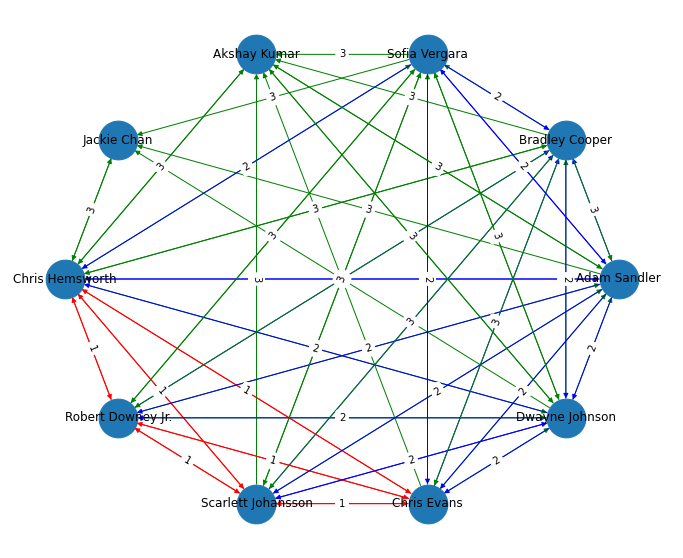

In [4]:
plot_movies_distance_graph(dist, dist_depth=None)

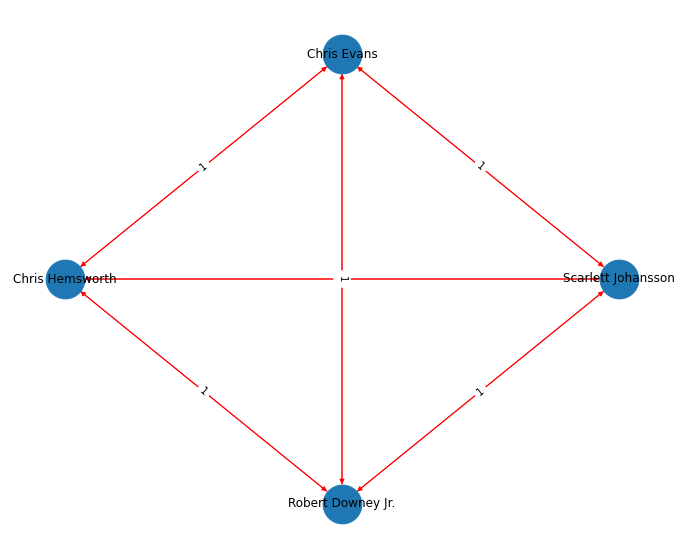

In [5]:
plot_movies_distance_graph(dist, dist_depth=1)

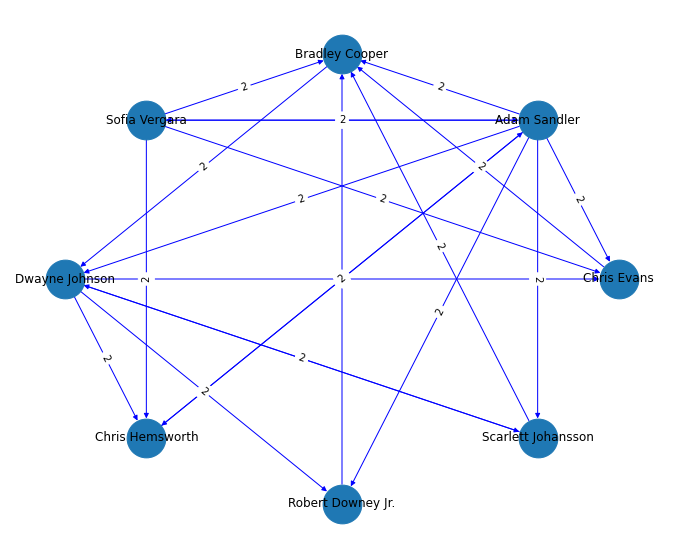

In [6]:
plot_movies_distance_graph(dist, dist_depth=2)

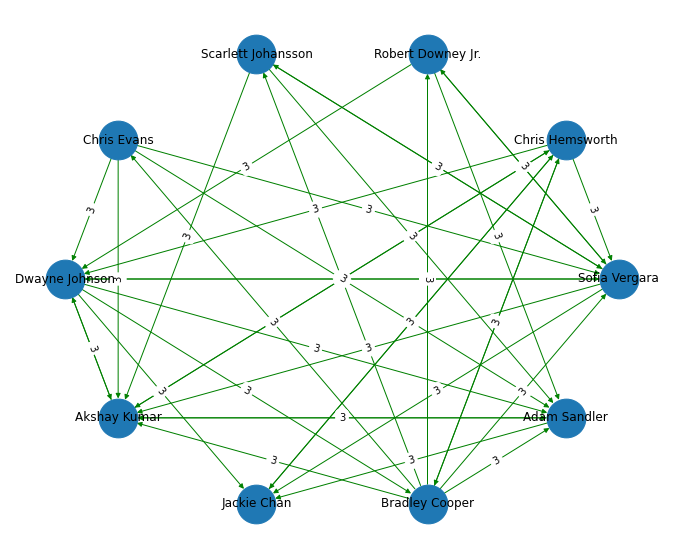

In [7]:
plot_movies_distance_graph(dist, dist_depth=3)

## Wordcloud

In [20]:
additional_stop_words = {'Dwayne', 'Johnson', 'one', 'two', 'three', 'gets', 'will', 'Jackie', 'Chan', 'â',
                        'whose', 'Adam', 'Sandler', 'Scarlett', 'Johansson', 'Mr'}
                    

In [21]:
def plot_word_cloud(actor: str, additional_stop_words: set):
    with open(f'{actor}.txt', 'r') as f:
        text = f.readlines()
    text = ' '.join(text)
    wordcloud = WordCloud(stopwords=STOPWORDS | additional_stop_words, background_color='white').generate(text)

    print(f'{actor}:')
    plt.subplots(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Dwayne Johnson:


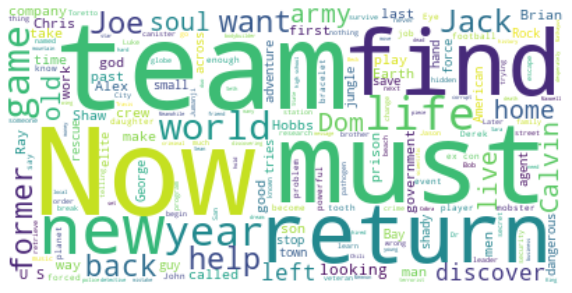

In [22]:
plot_word_cloud('Dwayne Johnson', additional_stop_words)

Chris Hemsworth:


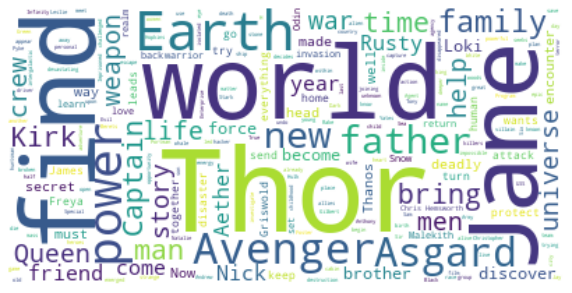

In [23]:
plot_word_cloud('Chris Hemsworth', additional_stop_words)

Robert Downey Jr.:


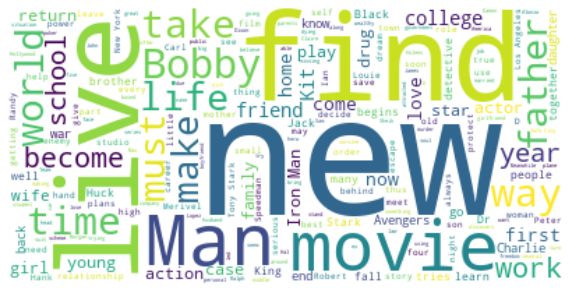

In [24]:
plot_word_cloud('Robert Downey Jr.', additional_stop_words)

Akshay Kumar:


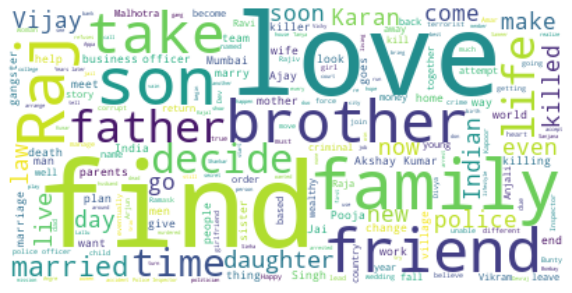

In [25]:
plot_word_cloud('Akshay Kumar', additional_stop_words)

Jackie Chan:


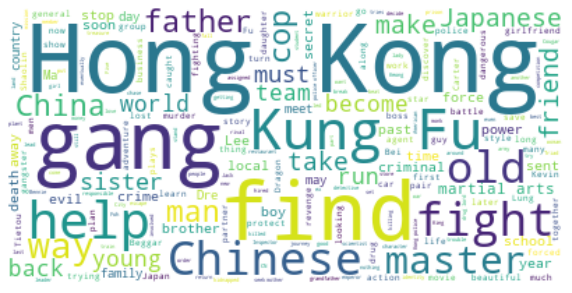

In [26]:
plot_word_cloud('Jackie Chan', additional_stop_words)

Bradley Cooper:


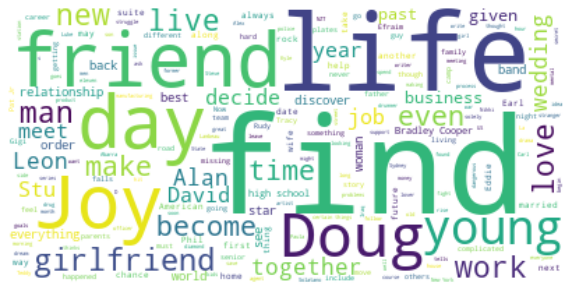

In [27]:
plot_word_cloud('Bradley Cooper', additional_stop_words)

Adam Sandler:


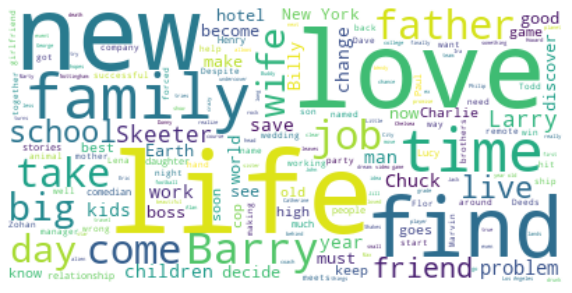

In [28]:
plot_word_cloud('Adam Sandler', additional_stop_words)

Scarlett Johansson:


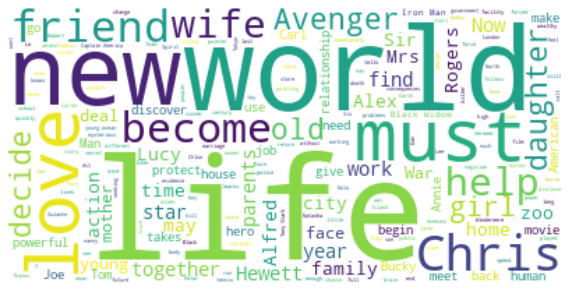

In [29]:
plot_word_cloud('Scarlett Johansson', additional_stop_words)

Sofia Vergara:


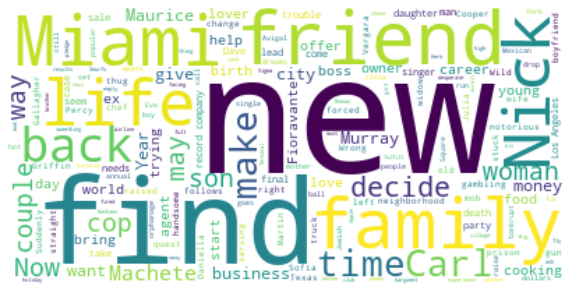

In [30]:
plot_word_cloud('Sofia Vergara', additional_stop_words)

Chris Evans:


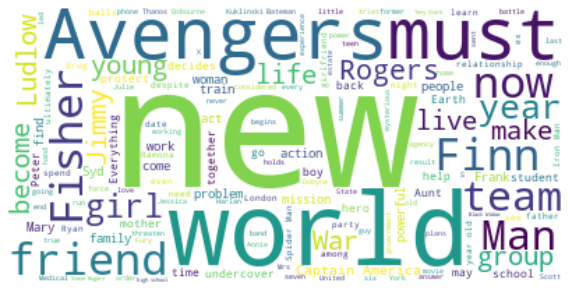

In [31]:
plot_word_cloud('Chris Evans', additional_stop_words)